In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
df1 = pd.read_excel('Master_file_Lattanzi_Cu_2012_ES_v2.xlsx', index_col=0)

df1.head(5)

,Site_Burial,State,Sample,Cr,Mn,Fe,Co,Ni,Cu,Zn,As,Se,Ag,Sn,Sb,Au,Pb,Bi
ANID,,,,,,,,,,,,,,,,,,
GDL001,Lister,NJ,Artifact,12.068216,0.0,25.160330,0.038567,0.202703,999697.982306,1.342716,0.489401,0.000000,262.042867,0.011563,0.046115,0.000000,0.574025,0.041191
GDL002,Lister,NJ,Artifact,35.744190,0.0,393.468433,0.170943,1.140631,999478.141048,5.365543,22.372640,4.643938,53.488031,0.096246,0.230051,0.001335,3.908394,1.228576
GDL003,Lister,NJ,Artifact,43.142662,0.0,1219.034329,0.378246,2.230752,998695.838465,5.219331,7.910353,1.254788,22.416825,0.039123,0.109676,0.000000,2.375983,0.049466
GDL004,Lister,NJ,Artifact,336.280570,0.0,2111.190259,0.440908,4.409549,997489.230602,4.307899,32.675812,4.791199,11.801586,0.066135,0.248599,0.004525,4.540566,0.011791
GDL005,Lister,NJ,Artifact,5.722844,0.0,75.097867,0.045153,0.209395,999872.356070,0.869652,6.342742,1.479191,37.475147,0.028733,0.032311,0.002385,0.282574,0.055938


In [2]:
df1.rename(columns={'Site/Burial': 'Site_Burial'}, inplace=True)
df1.head(1)

,Site_Burial,State,Sample,Cr,Mn,Fe,Co,Ni,Cu,Zn,As,Se,Ag,Sn,Sb,Au,Pb,Bi
ANID,,,,,,,,,,,,,,,,,,
GDL001,Lister,NJ,Artifact,12.068216,0.0,25.16033,0.038567,0.202703,999697.982306,1.342716,0.489401,0.0,262.042867,0.011563,0.046115,0.0,0.574025,0.041191


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556 entries, GDL001 to GDL578b
Data columns (total 18 columns):
Site_Burial    556 non-null object
State          556 non-null object
Sample         556 non-null object
Cr             556 non-null float64
Mn             556 non-null float64
Fe             556 non-null float64
Co             556 non-null float64
Ni             556 non-null float64
Cu             556 non-null float64
Zn             556 non-null float64
As             556 non-null float64
Se             556 non-null float64
Ag             556 non-null float64
Sn             556 non-null float64
Sb             556 non-null float64
Au             556 non-null float64
Pb             556 non-null float64
Bi             556 non-null float64
dtypes: float64(15), object(3)
memory usage: 82.5+ KB


In [4]:
df1['Site_Burial'] = df1['Site_Burial'].astype('category')
df1['State'] = df1['State'].astype('category')
df1['Sample'] = df1['Sample'].astype('category')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556 entries, GDL001 to GDL578b
Data columns (total 18 columns):
Site_Burial    556 non-null category
State          556 non-null category
Sample         556 non-null category
Cr             556 non-null float64
Mn             556 non-null float64
Fe             556 non-null float64
Co             556 non-null float64
Ni             556 non-null float64
Cu             556 non-null float64
Zn             556 non-null float64
As             556 non-null float64
Se             556 non-null float64
Ag             556 non-null float64
Sn             556 non-null float64
Sb             556 non-null float64
Au             556 non-null float64
Pb             556 non-null float64
Bi             556 non-null float64
dtypes: category(3), float64(15)
memory usage: 71.8+ KB


In [6]:
df1.describe(include=['category'])

,Site_Burial,State,Sample
count,556,556,556
unique,5,8,2
top,Nassawango,NJ,Artifact
freq,192,329,498


In [7]:
df1.Site_Burial.value_counts()

Nassawango     192
Abbott Farm    118
Rosenkrans      91
Lister          90
Non-Burial      65
Name: Site_Burial, dtype: int64

In [8]:
df1.State.value_counts()

NJ    329
MD    192
PA     10
MI     10
CA      6
NC      5
NY      3
VA      1
Name: State, dtype: int64

In [9]:
df1.Sample.value_counts()

Artifact    498
Geo          58
Name: Sample, dtype: int64

In [10]:
# Number Samples per state
State = df1.groupby(['State'])
State_by_Sample = State['Sample'].count()
print(State_by_Sample)

State
CA      6
MD    192
MI     10
NC      5
NJ    329
NY      3
PA     10
VA      1
Name: Sample, dtype: int64


In [11]:
# Number of Samples per state by type of Sample
sample_type = df1.groupby(['Sample', 'State'])
sample_by_state = sample_type.State.count()
print(sample_by_state)

Sample    State
Artifact  MD       192
          NJ       305
          VA         1
Geo       CA         6
          MI        10
          NC         5
          NJ        24
          NY         3
          PA        10
Name: State, dtype: int64


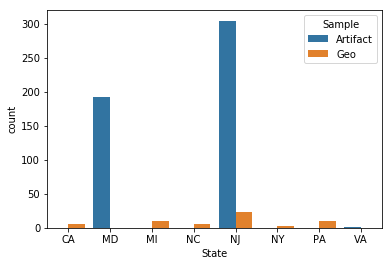

In [12]:
#Now, how do I illustrate this with stacked bars? 
ax = sns.countplot(x="State", hue="Sample", data=df1)


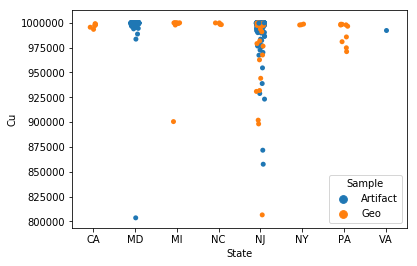

In [13]:
#'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
      # 'Zn', 'As', 'Se', 'Ag', 'Sn', 'Sb', 'Au', 'Pb', 'Bi'
ax1 = sns.stripplot(x="State", y="Cu", data=df1, hue="Sample")


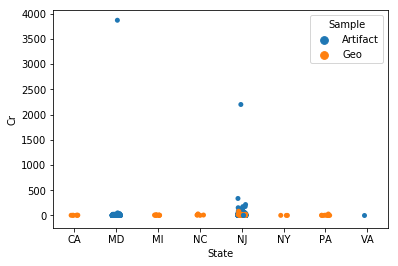

In [14]:
#'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
      # 'Zn', 'As', 'Se', 'Ag', 'Sn', 'Sb', 'Au', 'Pb', 'Bi'

ax2 = sns.stripplot(x="State", y="Cr", data=df1, hue="Sample")


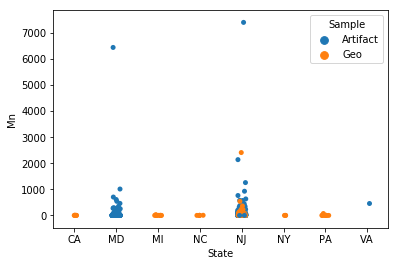

In [15]:
#'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
      # 'Zn', 'As', 'Se', 'Ag', 'Sn', 'Sb', 'Au', 'Pb', 'Bi'

ax3 = sns.stripplot(x="State", y="Mn", data=df1, hue="Sample")


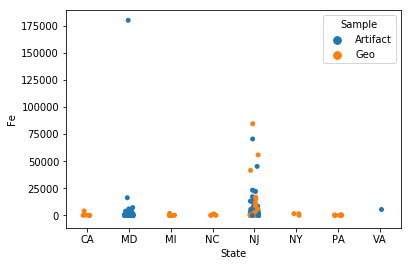

In [16]:
#'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
      # 'Zn', 'As', 'Se', 'Ag', 'Sn', 'Sb', 'Au', 'Pb', 'Bi'
ax4 = sns.stripplot(x="State", y="Fe", data=df1, hue="Sample")


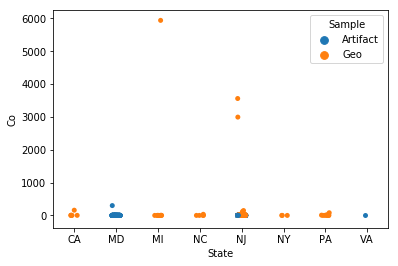

In [17]:
#'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
      # 'Zn', 'As', 'Se', 'Ag', 'Sn', 'Sb', 'Au', 'Pb', 'Bi'

ax5 = sns.stripplot(x="State", y="Co", data=df1, hue="Sample")


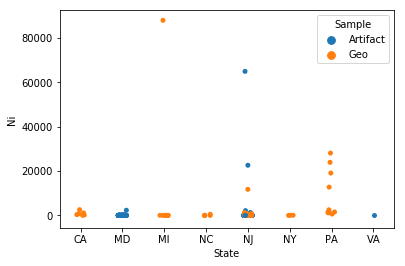

In [18]:
#'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
      # 'Zn', 'As', 'Se', 'Ag', 'Sn', 'Sb', 'Au', 'Pb', 'Bi'

ax6 = sns.stripplot(x="State", y="Ni", data=df1, hue="Sample")


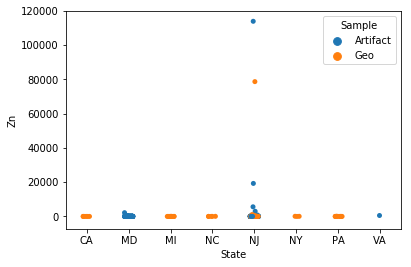

In [19]:
#'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
      # 'Zn', 'As', 'Se', 'Ag', 'Sn', 'Sb', 'Au', 'Pb', 'Bi'

ax7 = sns.stripplot(x="State", y="Zn", data=df1, hue="Sample")


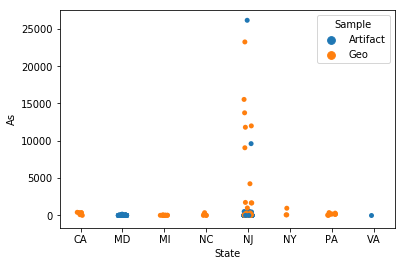

In [20]:
#'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
      # 'Zn', 'As', 'Se', 'Ag', 'Sn', 'Sb', 'Au', 'Pb', 'Bi'

ax8 = sns.stripplot(x="State", y="As", data=df1, hue="Sample")


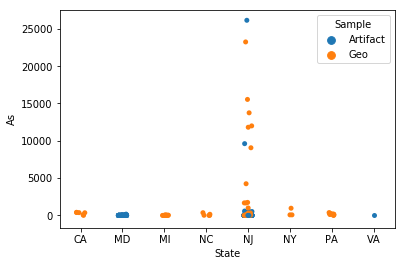

In [21]:
#'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
      # 'Zn', 'As', 'Se', 'Ag', 'Sn', 'Sb', 'Au', 'Pb', 'Bi'

ax8 = sns.stripplot(x="State", y="As", data=df1, hue="Sample")


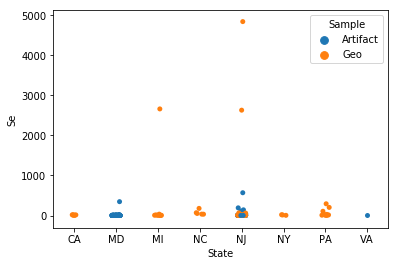

In [22]:
#'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
      # 'Zn', 'As', 'Se', 'Ag', 'Sn', 'Sb', 'Au', 'Pb', 'Bi'
ax9 = sns.stripplot(x="State", y="Se", data=df1, hue="Sample")


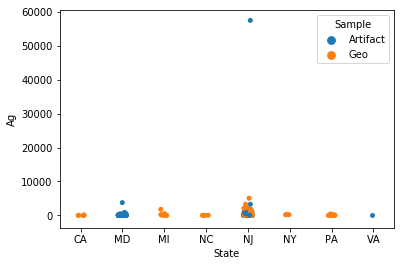

In [23]:
#'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
      # 'Zn', 'As', 'Se', 'Ag', 'Sn', 'Sb', 'Au', 'Pb', 'Bi'

ax10 = sns.stripplot(x="State", y="Ag", data=df1, hue="Sample")


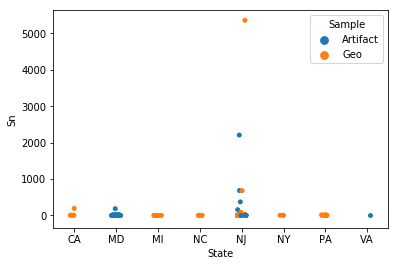

In [24]:
#'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
      # 'Zn', 'As', 'Se', 'Ag', 'Sn', 'Sb', 'Au', 'Pb', 'Bi'
ax11 = sns.stripplot(x="State", y="Sn", data=df1, hue="Sample")


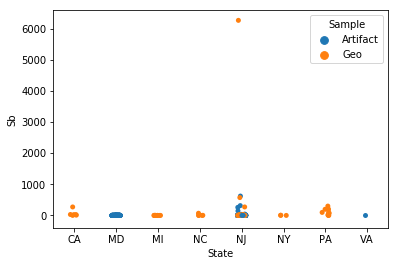

In [25]:
#'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
      # 'Zn', 'As', 'Se', 'Ag', 'Sn', 'Sb', 'Au', 'Pb', 'Bi'

ax12 = sns.stripplot(x="State", y="Sb", data=df1, hue="Sample")


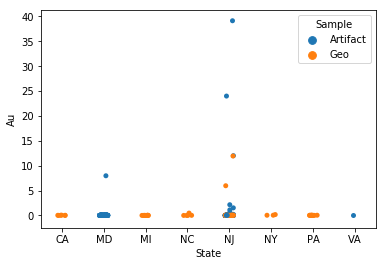

In [26]:
#'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
      # 'Zn', 'As', 'Se', 'Ag', 'Sn', 'Sb', 'Au', 'Pb', 'Bi'
ax13 = sns.stripplot(x="State", y="Au", data=df1, hue="Sample")


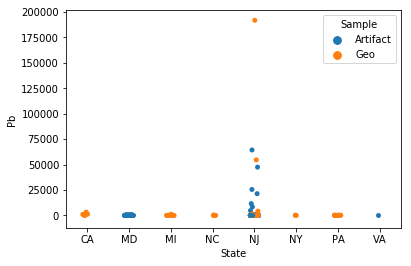

In [27]:
#'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
      # 'Zn', 'As', 'Se', 'Ag', 'Sn', 'Sb', 'Au', 'Pb', 'Bi'
ax14 = sns.stripplot(x="State", y="Pb", data=df1, hue="Sample")


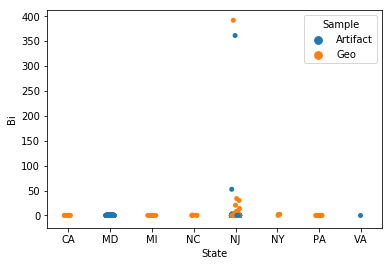

In [28]:
#'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
      # 'Zn', 'As', 'Se', 'Ag', 'Sn', 'Sb', 'Au', 'Pb', 'Bi'

ax15 = sns.stripplot(x="State", y="Bi", data=df1, hue="Sample")

In [29]:
df2 = pd.get_dummies(df1, columns=["Site_Burial", "State", "Sample"], prefix=["Site_", "State_", "Sample_"])

In [30]:
pd.set_option('display.max_columns', 50)
df2.head()

,Cr,Mn,Fe,Co,Ni,Cu,Zn,As,Se,Ag,Sn,Sb,Au,Pb,Bi,Site__Abbott Farm,Site__Lister,Site__Nassawango,Site__Non-Burial,Site__Rosenkrans,State__CA,State__MD,State__MI,State__NC,State__NJ,State__NY,State__PA,State__VA,Sample__Artifact,Sample__Geo
ANID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GDL001,12.068216,0.0,25.160330,0.038567,0.202703,999697.982306,1.342716,0.489401,0.000000,262.042867,0.011563,0.046115,0.000000,0.574025,0.041191,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
GDL002,35.744190,0.0,393.468433,0.170943,1.140631,999478.141048,5.365543,22.372640,4.643938,53.488031,0.096246,0.230051,0.001335,3.908394,1.228576,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
GDL003,43.142662,0.0,1219.034329,0.378246,2.230752,998695.838465,5.219331,7.910353,1.254788,22.416825,0.039123,0.109676,0.000000,2.375983,0.049466,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
GDL004,336.280570,0.0,2111.190259,0.440908,4.409549,997489.230602,4.307899,32.675812,4.791199,11.801586,0.066135,0.248599,0.004525,4.540566,0.011791,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
GDL005,5.722844,0.0,75.097867,0.045153,0.209395,999872.356070,0.869652,6.342742,1.479191,37.475147,0.028733,0.032311,0.002385,0.282574,0.055938,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [31]:
df2.to_excel('Master_file_Lattanzi_Cu_2012_ES_v3.xlsx', header=True, index=True) 